In [1]:
from sklearn.datasets import load_iris

data = load_iris()
X, y = data['data'][:, 3:], data['target']

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', C=10)
model.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

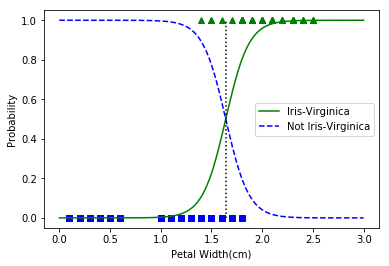

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = model.predict_proba(X_new)
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot(X_new, y_proba[:, 1], "g-", label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], "b--", label='Not Iris-Virginica')
decision_boundary = X_new[y_proba[:, 1]>= 0.5][0]
plt.plot([decision_boundary, decision_boundary], [0,1], 'k:')
plt.xlabel('Petal Width(cm)')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('x_scaled', StandardScaler()), 
                     ('softmax', LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10))])

pipeline.fit(X, y)

Pipeline(memory=None,
     steps=[('x_scaled', StandardScaler(copy=True, with_mean=True, with_std=True)), ('softmax', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [9]:
from sklearn.model_selection import cross_val_score, cross_val_predict

score = cross_val_score(pipeline, X, y, cv=3, scoring='accuracy')
print(score)

[ 1.          0.90196078  0.97916667]


In [10]:
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(pipeline, X, y, cv=3)
print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]


In [14]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X, y = data['data'], data['target']

[ 151.   75.  141.  206.  135.   97.  138.   63.  110.  310.  101.   69.
  179.  185.  118.  171.  166.  144.   97.  168.   68.   49.   68.  245.
  184.  202.  137.   85.  131.  283.  129.   59.  341.   87.   65.  102.
  265.  276.  252.   90.  100.   55.   61.   92.  259.   53.  190.  142.
   75.  142.  155.  225.   59.  104.  182.  128.   52.   37.  170.  170.
   61.  144.   52.  128.   71.  163.  150.   97.  160.  178.   48.  270.
  202.  111.   85.   42.  170.  200.  252.  113.  143.   51.   52.  210.
   65.  141.   55.  134.   42.  111.   98.  164.   48.   96.   90.  162.
  150.  279.   92.   83.  128.  102.  302.  198.   95.   53.  134.  144.
  232.   81.  104.   59.  246.  297.  258.  229.  275.  281.  179.  200.
  200.  173.  180.   84.  121.  161.   99.  109.  115.  268.  274.  158.
  107.   83.  103.  272.   85.  280.  336.  281.  118.  317.  235.   60.
  174.  259.  178.  128.   96.  126.  288.   88.  292.   71.  197.  186.
   25.   84.   96.  195.   53.  217.  172.  131.  2